In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from ase.io import read
import pysages
import numpy as np
from ase.io import read
from pysages.approxfun import compute_mesh
import pickle
from openmm import unit
from utils import dihedrals

pi = np.pi

In [69]:
path = 'results/wtmetad_1.2_0.35_200_5000'
# path = '../metadynamics/3D/alanine_dipeptide/test/results_unbiased_long/unbiased'

traj = read(f'{path}.pdb', index=':')
dat = pd.read_csv(f'{path}.dat', header=None, sep='\t')

In [35]:
# dat = dihedrals(traj, [(1,3,4,6),(3,4,6,8)])

## metadynamics

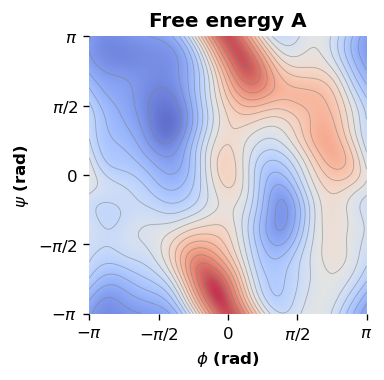

In [36]:
# fig, (ax1, ax2) = plt.subplots(figsize=(11, 5), ncols=2)

# ax1.hexbin(dat[1], dat[2], gridsize=20)

with open(f'{path}.pkl','rb') as f:
    run_results = pickle.load(f)

fe_result = pysages.analyze(run_results)
metapotential = fe_result["metapotential"]

T = 300 * unit.kelvin
deltaT = 5000
kB = unit.BOLTZMANN_CONSTANT_kB * unit.AVOGADRO_CONSTANT_NA
kB = kB.value_in_unit(unit.kilojoules_per_mole / unit.kelvin)

plot_grid = pysages.Grid(lower=(-pi, -pi), upper=(pi, pi), shape=(128, 128), periodic=True)
xi = (compute_mesh(plot_grid) + 1) / 2 * plot_grid.size + plot_grid.lower
alpha = 1 if deltaT is None else (T.value_in_unit(unit.kelvin) + deltaT) / deltaT
kT = kB * T.value_in_unit(unit.kelvin)

A = metapotential(xi) * -alpha / kT
A = A - A.min()
A = A.reshape(plot_grid.shape).T

# Energy landscape
fig, ax = plt.subplots(dpi=120, figsize=(5,3))
im = ax.imshow(A, interpolation="bicubic", origin="lower", extent=[-pi, pi, -pi, pi], 
               cmap='coolwarm', alpha=0.8)
contours = ax.contour(A, levels=15, linewidths=0.5, colors="grey", 
                     extent=[-pi, pi, -pi, pi], alpha=0.6)

ax.set_xlabel(r"$\phi$ (rad)", fontweight='bold')
ax.set_ylabel(r"$\psi$ (rad)", fontweight='bold')
ax.set_xticks([-pi, -pi/2, 0, pi/2, pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=10, fontweight='bold')
ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])
ax.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=10, fontweight='bold')
#ax.set_yticklabels([])
ax.set_xlim(-pi, pi)
ax.set_ylim(-pi, pi)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.title(f'Free energy A', fontweight='bold')

plt.savefig('figures/ala2_FEL.pdf', 
            dpi=300,
            bbox_inches='tight',
            transparent=True,
            format='pdf')

plt.show()

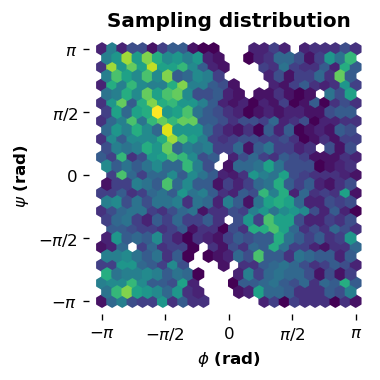

In [70]:
fig, ax = plt.subplots(dpi=120, figsize=(3,3))

ax.hexbin(dat[1][:10000], dat[2][:10000], gridsize=25, mincnt=1)
# ax.hexbin(dat[:,0], dat[:,1], gridsize=25, mincnt=1)
ax.set_xlabel(r"$\phi$ (rad)", fontweight='bold')
ax.set_ylabel(r"$\psi$ (rad)", fontweight='bold')
ax.set_xticks([-pi, -pi/2, 0, pi/2, pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=10, fontweight='bold')
ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])
ax.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=10, fontweight='bold')
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title(f'Sampling distribution', fontweight='bold')

plt.savefig('figures/ala2_SD.pdf', 
            dpi=300,
            bbox_inches='tight',
            transparent=True,
            format='pdf')

plt.show()


## ABF

In [72]:
path = 'results/abf_32'

traj = read(f'{path}.pdb', index=':')
dat = pd.read_csv(f'{path}.dat', header=None, sep='\t')

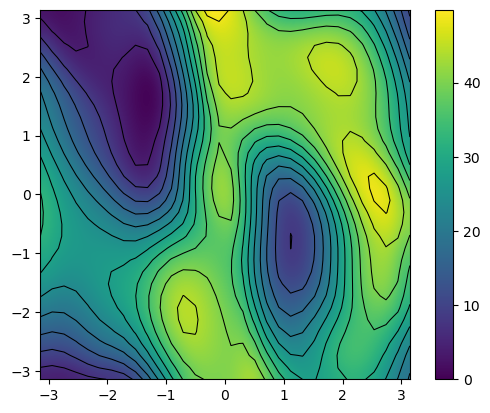

In [ ]:
with open(f'{path}.pkl','rb') as f:
    raw_result = pickle.load(f)
result = pysages.analyze(raw_result, topology=(14,))
surface = np.asarray(result["free_energy"])

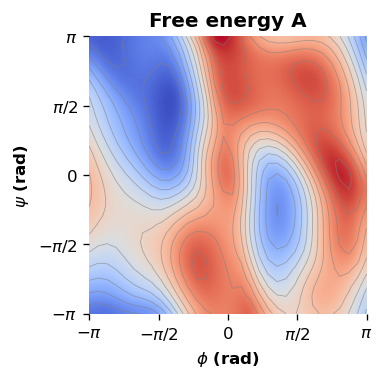

In [64]:
fig, ax = plt.subplots(dpi=120, figsize=(5,3))
im = ax.imshow(
    surface, interpolation="bicubic", origin="lower", extent=[-pi, pi, -pi, pi], aspect=1, cmap='coolwarm'
)
contours = ax.contour(surface, levels=15, linewidths=0.5, colors="grey", 
                     extent=[-pi, pi, -pi, pi], alpha=0.6)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_xlabel(r"$\phi$ (rad)", fontweight='bold')
ax.set_ylabel(r"$\psi$ (rad)", fontweight='bold')
ax.set_xticks([-pi, -pi/2, 0, pi/2, pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=10, fontweight='bold')
ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])
ax.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=10, fontweight='bold')

plt.title(f'Free energy A', fontweight='bold')

plt.savefig('figures/ala2_ABF_FEL.pdf', 
            dpi=300,
            bbox_inches='tight',
            transparent=True,
            format='pdf')

plt.show()

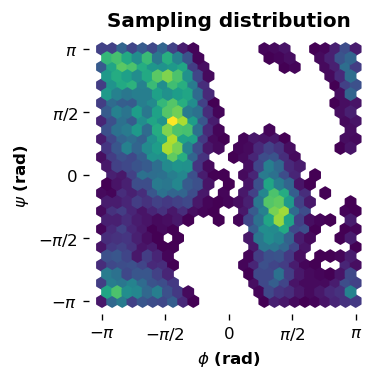

In [73]:
fig, ax = plt.subplots(dpi=120, figsize=(3,3))

ax.hexbin(dat[1][:10000], dat[2][:10000], gridsize=25, mincnt=1)
# ax.hexbin(dat[:,0], dat[:,1], gridsize=25, mincnt=1)
ax.set_xlabel(r"$\phi$ (rad)", fontweight='bold')
ax.set_ylabel(r"$\psi$ (rad)", fontweight='bold')
ax.set_xticks([-pi, -pi/2, 0, pi/2, pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=10, fontweight='bold')
ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])
ax.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=10, fontweight='bold')
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title(f'Sampling distribution', fontweight='bold')

plt.savefig('figures/ala2_ABF_SD.pdf', 
            dpi=300,
            bbox_inches='tight',
            transparent=True,
            format='pdf')

plt.show()

## OPES